## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Product taken flag
3. Age: Age of customer
4. PreferredLoginDevice: Preferred login device of the customer in last month
5. CityTier: City tier
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisited: Total number of person came with customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of the trip in a year by customer
12. Passport: Customer passport flag
13. OwnCar: Customers owns a car flag
14. NumberOfChildrenVisited: Total number of children visit with customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfactory score
2. ProductPitched: Product pitched by a salesperson
3. NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
4. DurationOfPitch: Duration of the pitch by a salesman to customer

## Perform an Exploratory Data Analysis on the data
Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier

### Read the dataset

In [2]:
data = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')

In [3]:
data

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Super Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Multi,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Multi,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [4]:
data.shape

(4888, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

* We can drop 'CustomerID' column as it is an ID variable and will not add value to the model.

In [6]:
data.drop('CustomerID', axis=1, inplace=True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


### Univariate analysis

In [8]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,7), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, data=data, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, data=data, kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, data=data, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color='black', linestyle='-') # Add median to the histogram

#### Age of customers

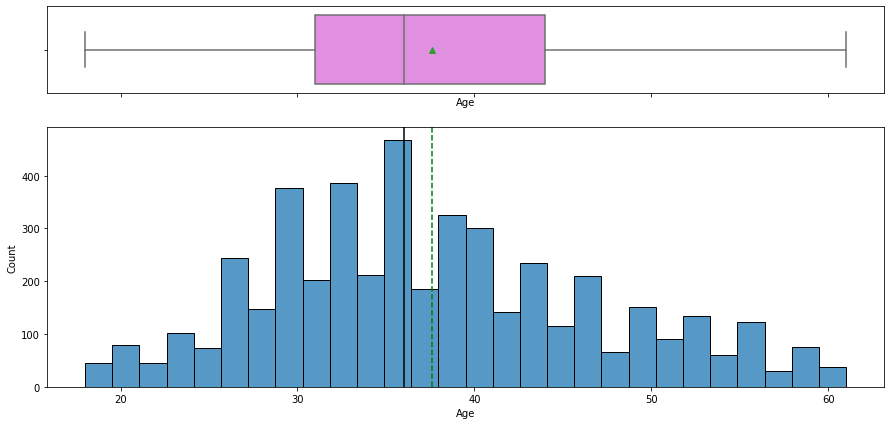

In [9]:
histogram_boxplot('Age')

* The distribution of age is slightly right-skewed.
* Age of customers is ranging from 18 to 61 with an average of 37.6 and a median of 36 years old.
* There are no outliers in this variable.

#### Duration of pitch

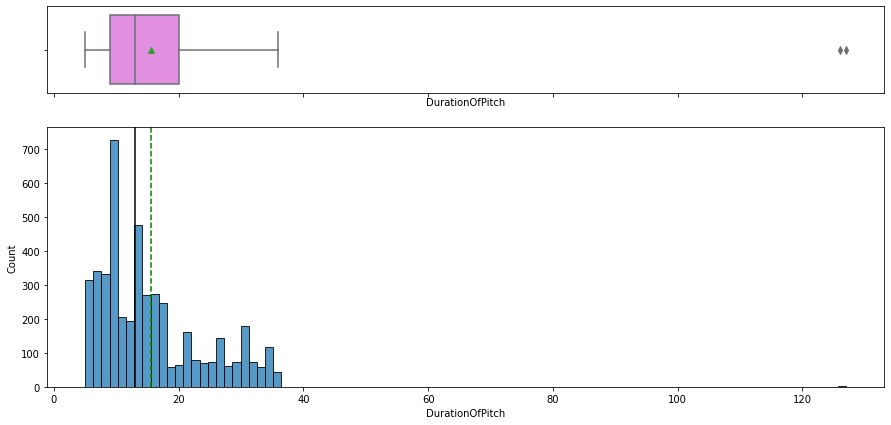

In [8]:
histogram_boxplot('DurationOfPitch')

* The distribution of duration of pitch is right-skewed
* The two outliers (126 and 127 minutes) could be the result of a typo.
* Average duration of the pitch is 15.5 minutes with a median of 13 minutes.
* Most pitches are ranging between 5 and 36 minutes.

#### Number of trips per year

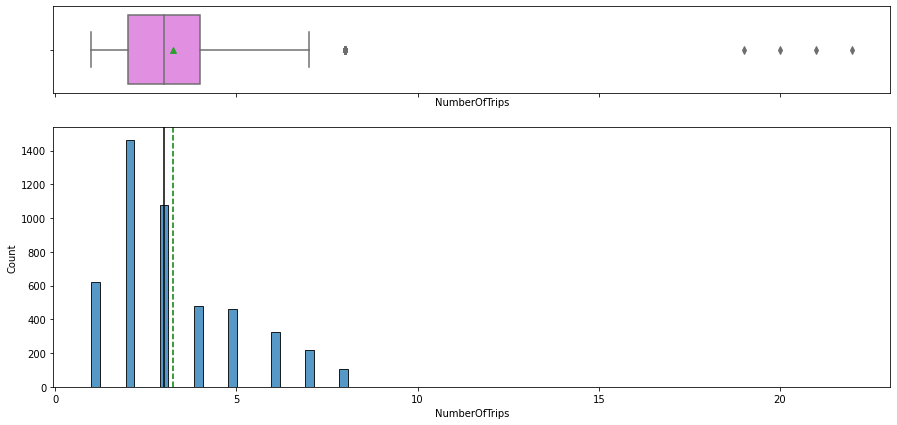

In [9]:
histogram_boxplot('NumberOfTrips')

* The distribution of number of trips is slightly right-skewed.
* There seems to be four outliers in the data : 19, 20, 21 and 22 trips per year seem quite unrealistic numbers.
* Number of trips per year is normally ranging from 1 to 8 with only few customers doing more than 3 trips.

#### Monthly income

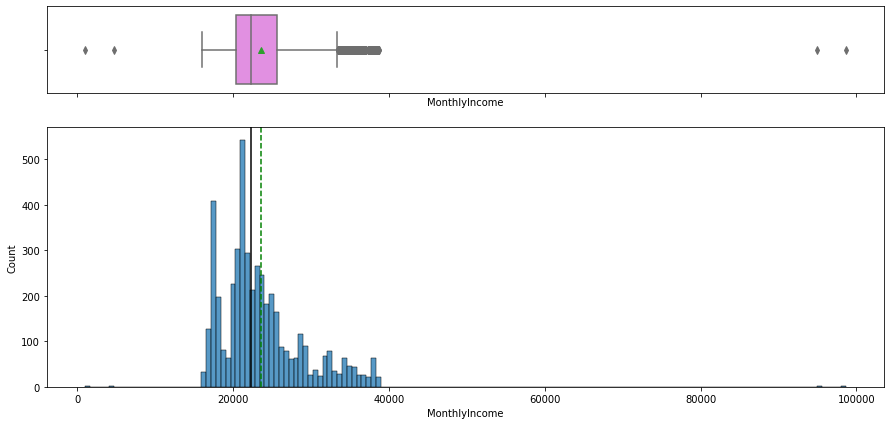

In [24]:
histogram_boxplot('MonthlyIncome')

* The distribution of monthly income is right-skewed.
* Most customers have monthly income ranging between 16,009 and 38,677 with an average of 23,620 and a median of 22,347.
* There could to be four outliers in the data: 1,000 - 4,678 - 95,000 - 98,678 seem out of range.

#### Product taken

In [10]:
def perc_on_bar(feature, figsize=(10,5), palette='Blues'):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(data[feature]) # length of the column
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=feature, data=data, palette=palette)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - .05 # width of the plot
        y = p.get_height() + 30         # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show()

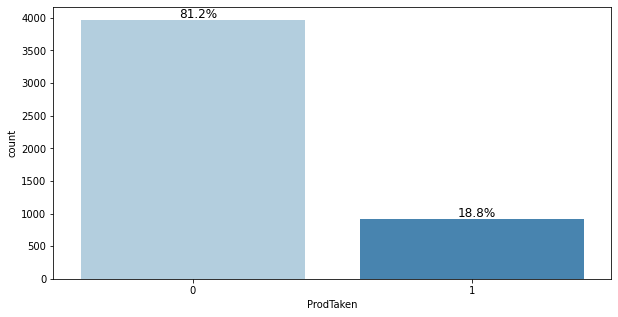

In [11]:
perc_on_bar('ProdTaken')

* This is our target variable
* Most customers do not take the product with only 18.8 % of customers buying the product.

#### Preferred login device

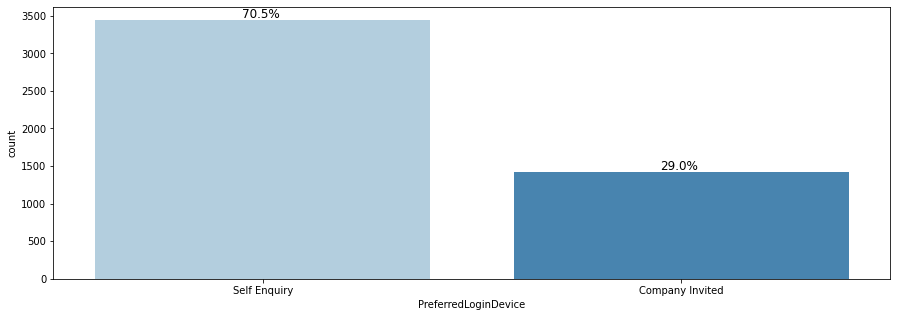

In [27]:
perc_on_bar('PreferredLoginDevice')

* Most customers are from self enquiry rather than company invited

#### City tier

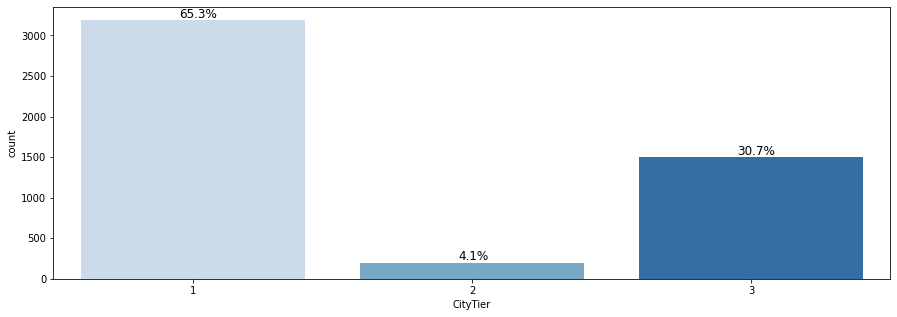

In [28]:
perc_on_bar('CityTier')

* Most customers are from city tier 1

#### Occupation

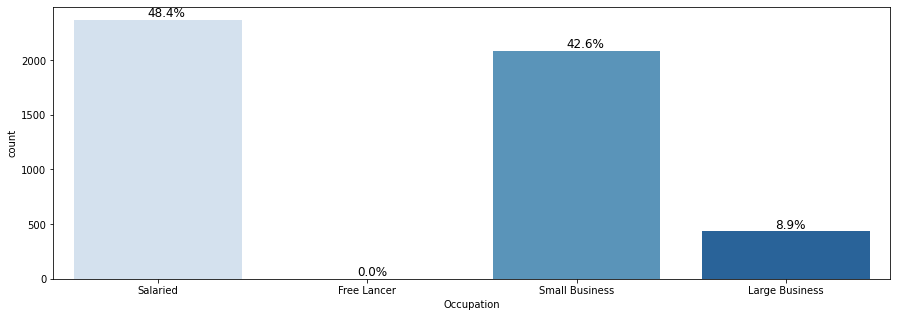

In [29]:
perc_on_bar('Occupation')

* Most customers are salaried or from small businesses.
* There arer only few customers being free lancers with less than 0.1%

#### Gender

* Here we can notice a mistake in the spelling of the word 'female'.
* Female and Fe Male categories should be merged into one category.

In [27]:
data['Gender'].replace('Fe Male', 'Female', inplace=True)

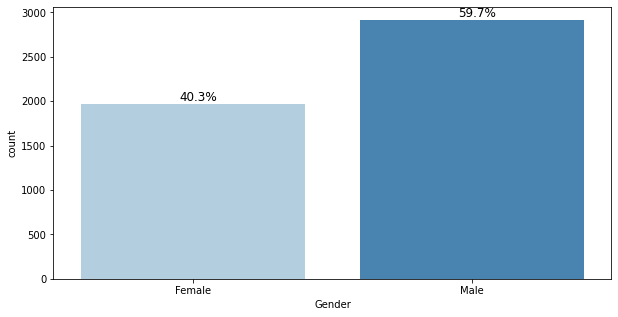

In [28]:
perc_on_bar('Gender')

* There are more male customers than female customers.

#### Number of person visited

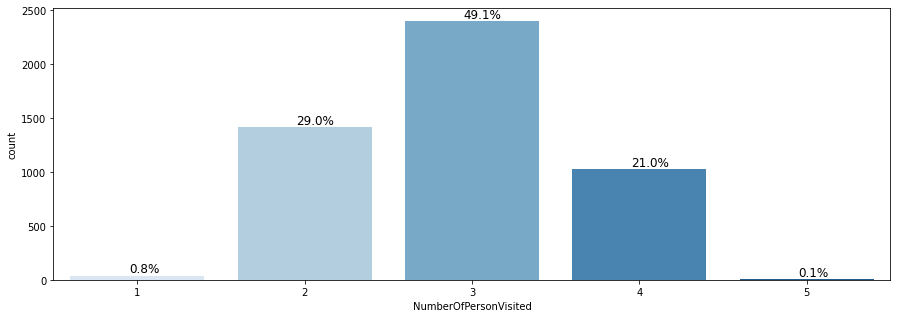

In [32]:
perc_on_bar('NumberOfPersonVisited')

* Most customers come in group of 3 persons

#### Number of follow ups

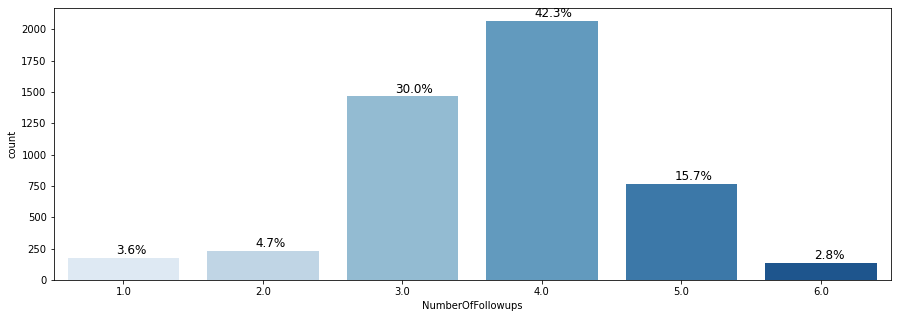

In [33]:
perc_on_bar('NumberOfFollowups')

* Number of follow ups ranges between 1 to 6 with mostly 3 or 4 follow ups.

#### Product pitched

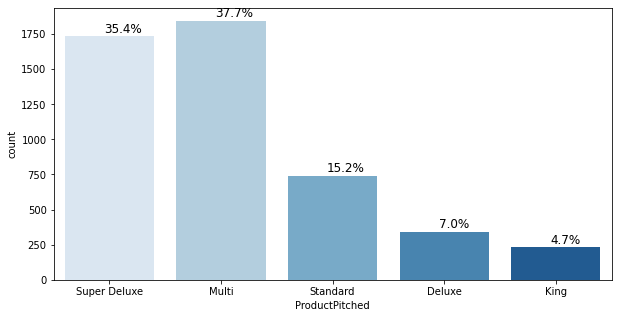

In [18]:
perc_on_bar('ProductPitched')

* Most often the product pitched is either Super Deluxe or Multi

#### Preferred hotel property rating by customer

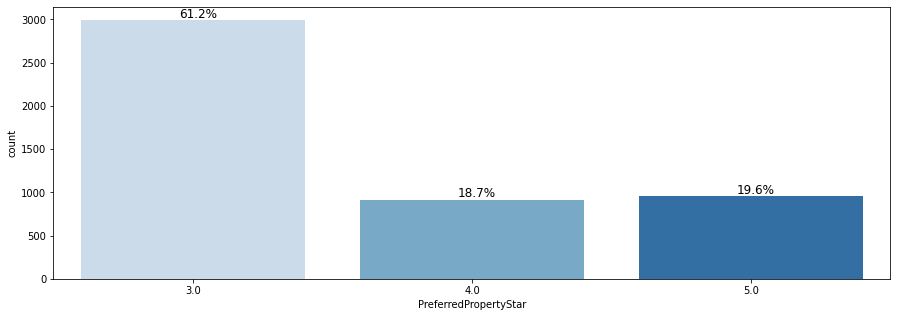

In [35]:
perc_on_bar('PreferredPropertyStar')

* Customers are only staying in 3 or more stars hotels with most of them staying in 3 stars hotels.

#### Marital status

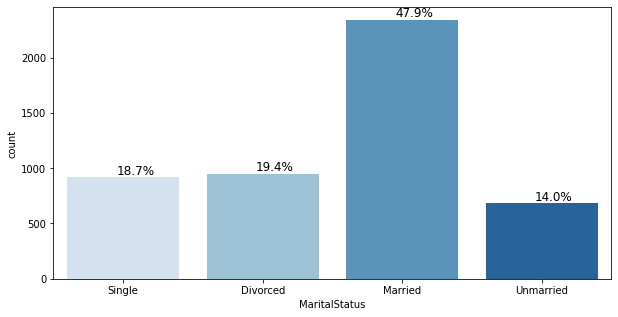

In [12]:
perc_on_bar('MaritalStatus')

* Most customers are married

#### Passport

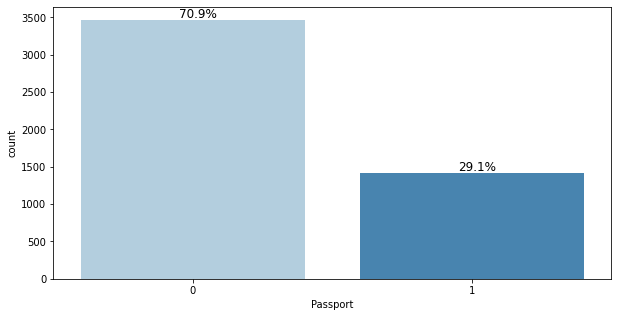

In [33]:
perc_on_bar('Passport')

* Most customers do not have a passport

#### Pitch satisfaction score

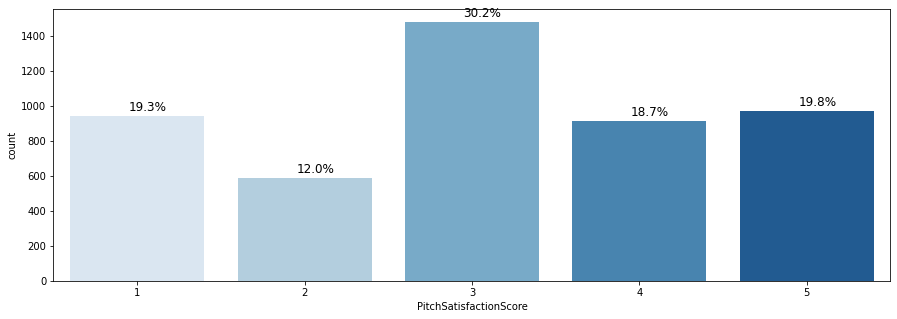

In [38]:
perc_on_bar('PitchSatisfactionScore')

* Sales pitch satisfactory score ranges from 1 to 5 with more than 30% of scores being 3.

#### Own car

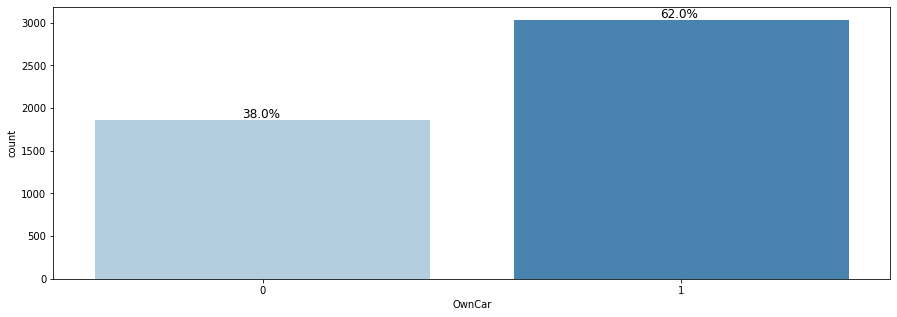

In [39]:
perc_on_bar('OwnCar')

* 62 % of customers have their own car

#### Number of children visited

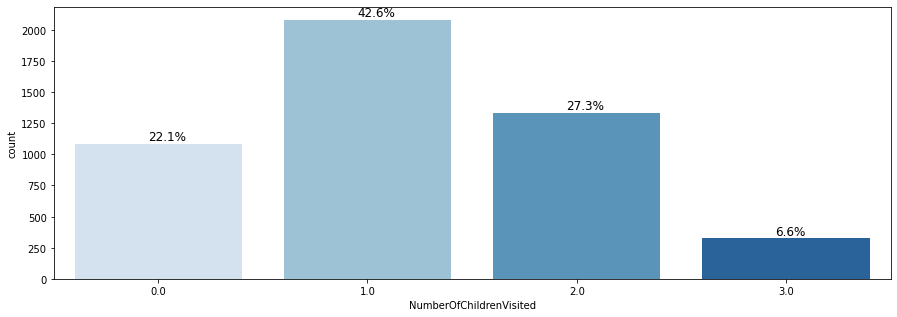

In [40]:
perc_on_bar('NumberOfChildrenVisited')

* Number of children visit with customer ranges between 0 and 3 with 42.6 % of visits having only one child.

#### Designation

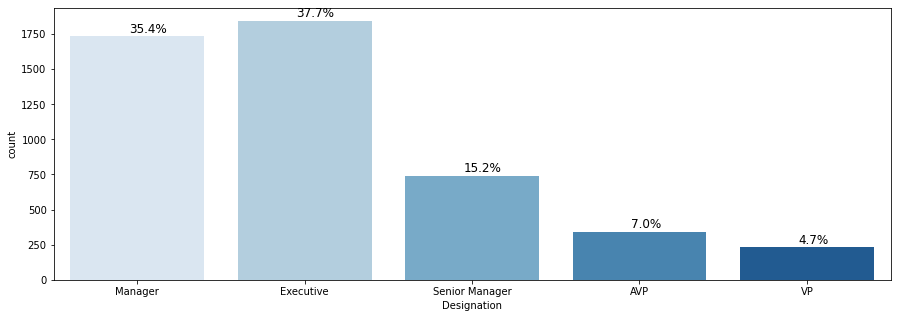

In [41]:
perc_on_bar('Designation')

* More than two thirds of customers are either managers or executives

### Bivariate analysis

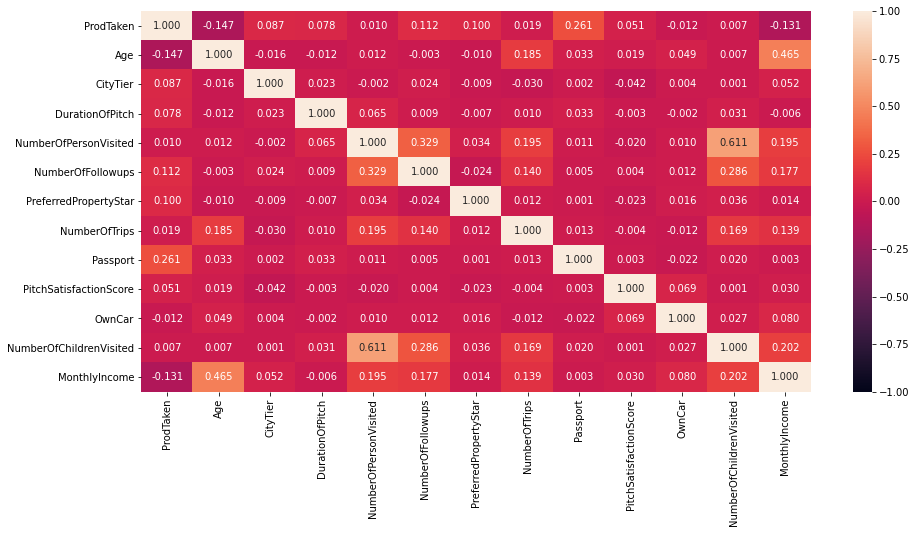

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True, fmt='.3f', vmin=-1);

* The number of person visited is highly correlated to the number of children visited (Pearson's coefficient: 0.611). Therefore, we could consider using only one of the two variables in the model.
* The monthly income is highly correlated to the age which makes perfect sense given the longer experience.
* Customers who have a passport are more likely to take the product. Indeed a passport is normally required in order to travel abroad.
* Younger customers are more likely to take the product

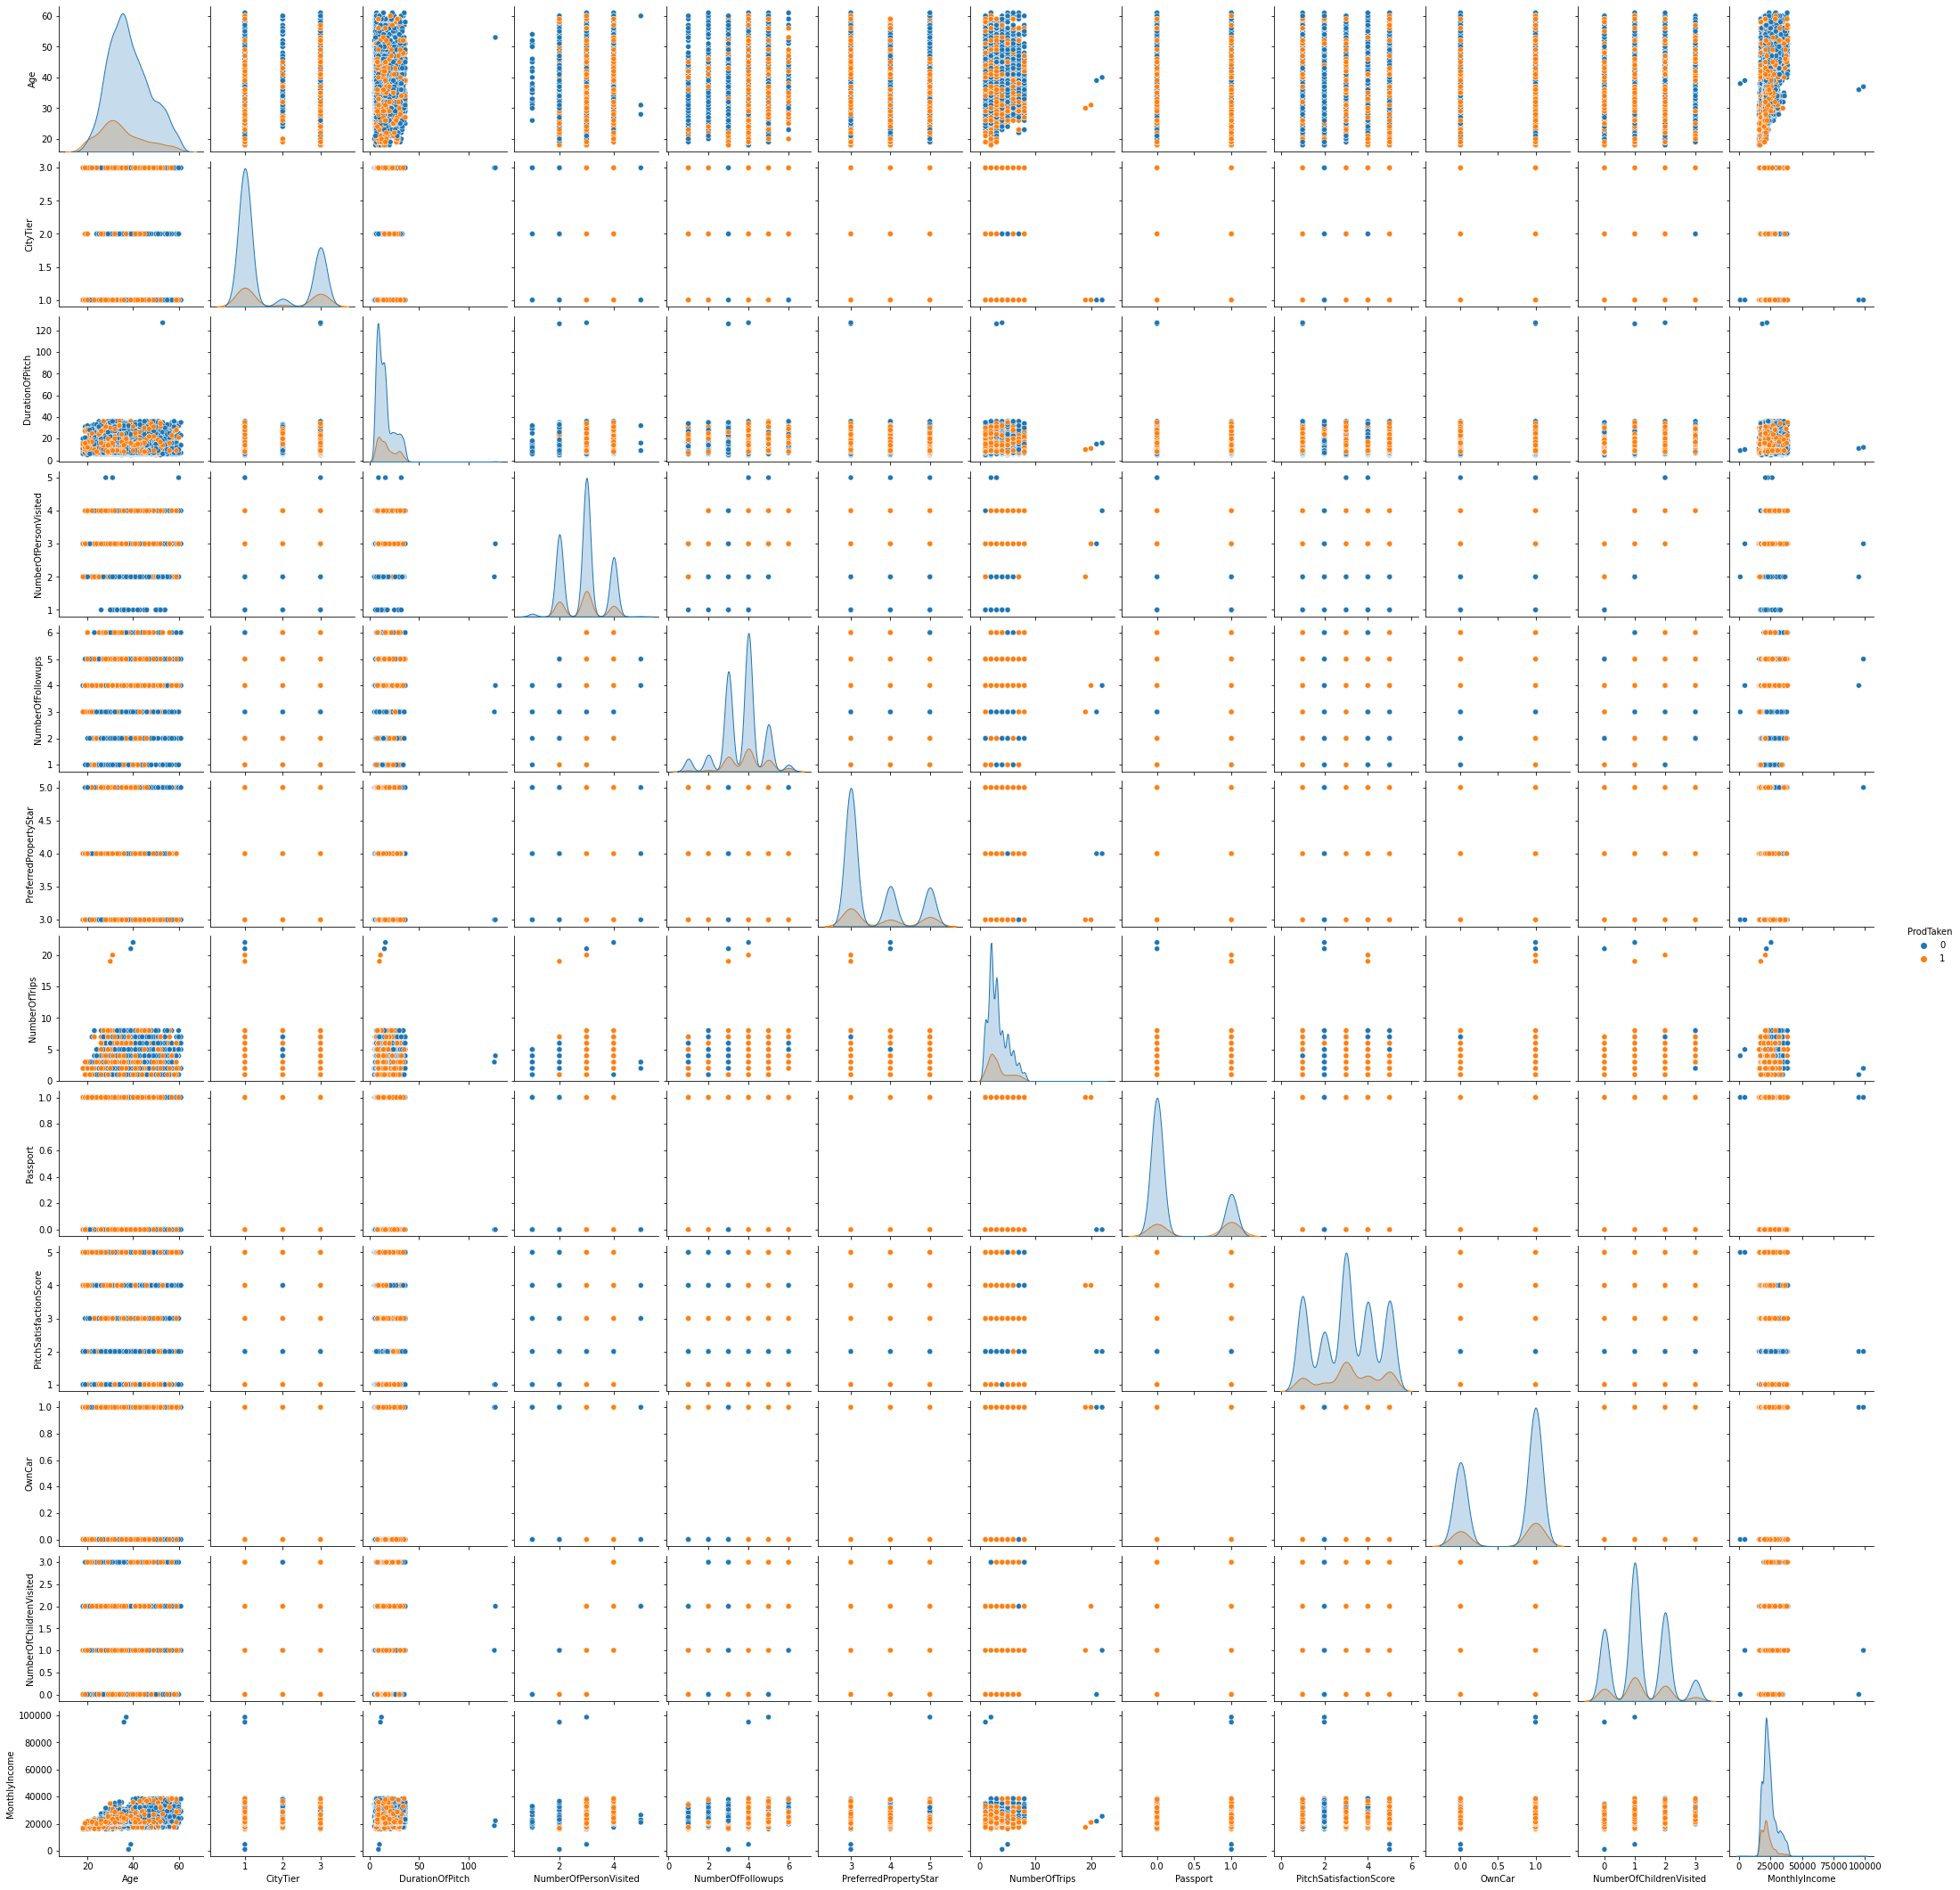

In [122]:
sns.pairplot(data=data,hue="ProdTaken");

In [50]:
data.groupby('ProdTaken').mean()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
ProdTaken,,,,,,,,,,,,
0,38.282092,1.615927,15.169325,2.901714,3.654286,3.542806,3.219531,0.233871,3.044355,0.622984,1.184190,23960.962835
1,34.770548,1.819565,16.873143,2.919565,3.941886,3.746171,3.308370,0.536957,3.223913,0.608696,1.200438,22172.827703


#### Impact of age, duration of picth and income on purchase

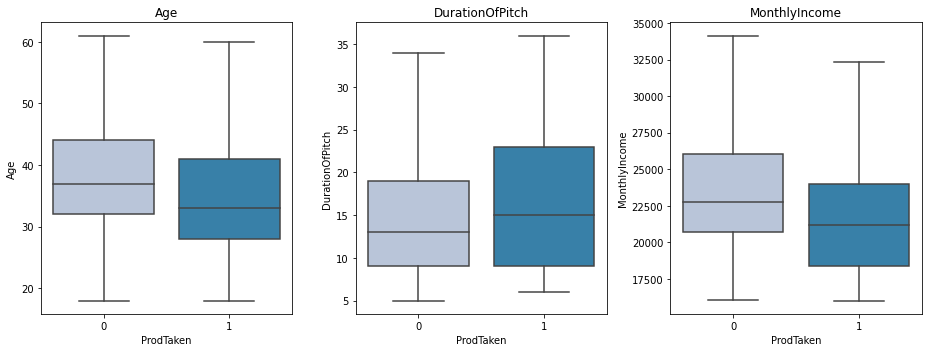

In [17]:
cols = ['Age', 'DurationOfPitch', 'MonthlyIncome']
plt.figure(figsize=(13,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(x='ProdTaken', y=variable, data=data, palette="PuBu", showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* People who purchased the product were younger than those who declined the product
* The duration of pitch was longer for those who purchased the product.
* The monthly income of those who purchased the product was lower which may seem contradictory.

#### Impact of City tier on purchase

In [14]:
def stacked_plot(x):
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


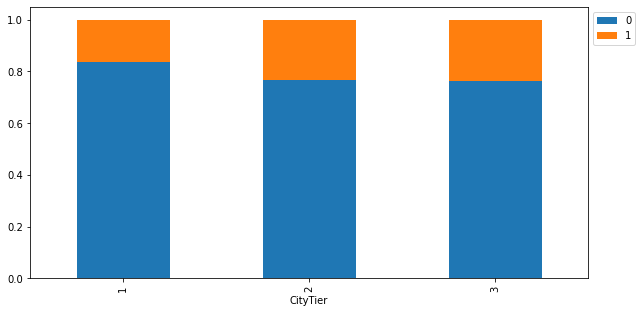

In [16]:
stacked_plot(data['CityTier'])

* The higher the city tier, the higher is the proportion of customers pruchasing the product.

#### Impact of Gender on purchase

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


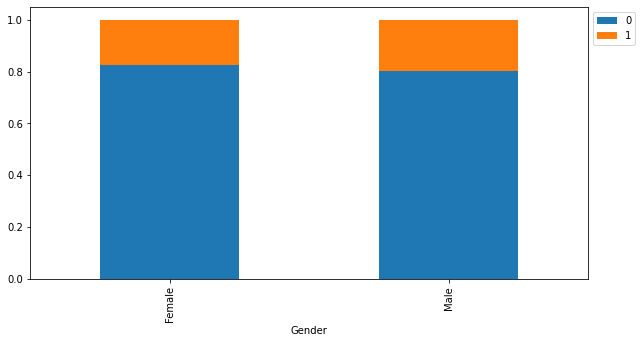

In [32]:
stacked_plot(data['Gender'])

* No significant difference between male and female.

#### Impact of number of person visited on purchase

ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        39    0    39
2                      1151  267  1418
3                      1942  460  2402
4                       833  193  1026
5                         3    0     3
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


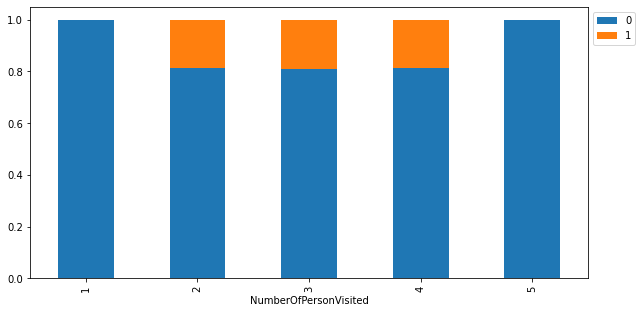

In [30]:
stacked_plot(data['NumberOfPersonVisited'])

* There are not enough cases of number of person visited being 1 or 5 to draw any firm conclusions.
* We do not see any significant difference on the proportion of purchase when the number of person visited is 2, 3 or 4.

#### Impact of number of follow ups on purchase

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1259  252  1511
4.0                1689  379  2068
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


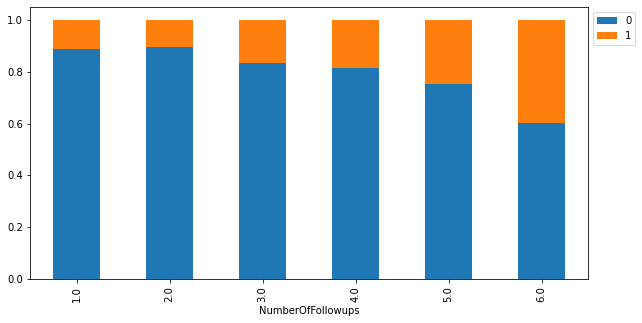

In [39]:
stacked_plot(data['NumberOfFollowups'])

* The higher the number of follow ups the higher the proportion of customers purchasing the product.

#### Impact of preferred property rating on purchase

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


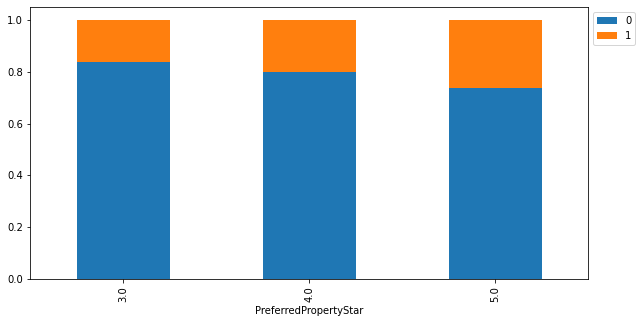

In [40]:
stacked_plot(data['PreferredPropertyStar'])

* The higher the preferred property rating, the higher is the proportion of customers purchasing the product.

#### Impact of number of trips on purchase

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1165  299  1464
3.0             990  229  1219
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
All            3966  918  4884
------------------------------------------------------------------------------------------------------------------------


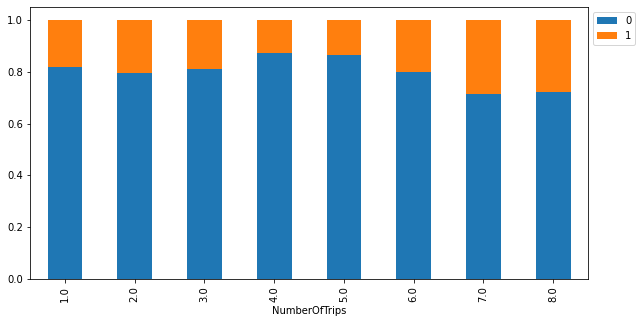

In [41]:
stacked_plot(data[data['NumberOfTrips'] < 9]['NumberOfTrips'])

* The trend is not perfectly clear but it seems that the more trips, the higher is the proportion of customers purchasing the product.

#### Impact of passport on purchase

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


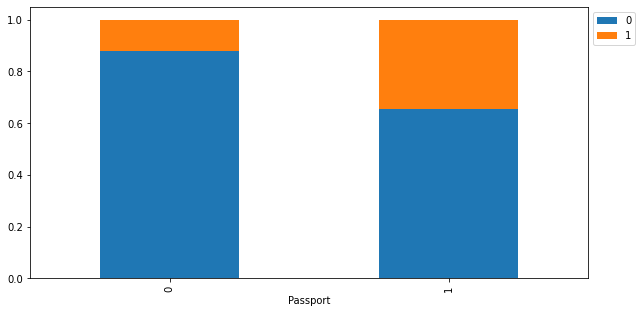

In [42]:
stacked_plot(data['Passport'])

* The proportion of customers purchasing the product is greater among the people having a passport: 34.7% vs 12.3%

#### Impact of pitch satisfaction score on purchase

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


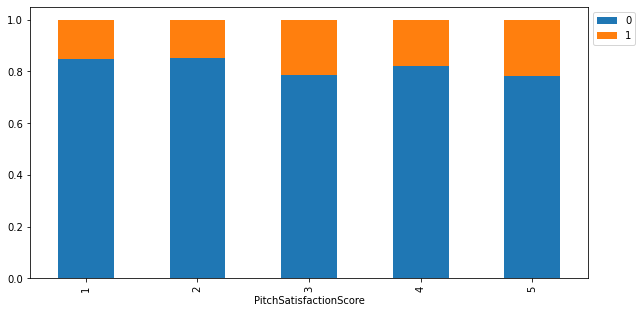

In [43]:
stacked_plot(data['PitchSatisfactionScore'])

* The proportion of customers purchasing the product is lower for low pitch satisfaction scores.

#### Impact of car owning on purchase

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


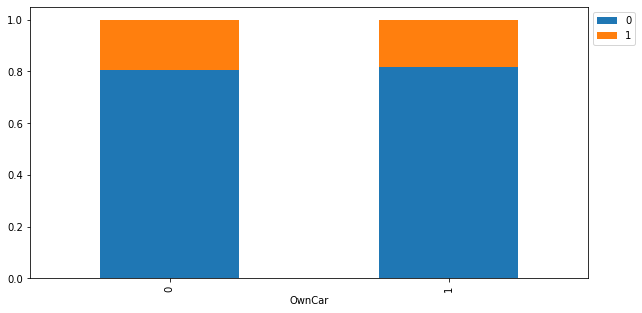

In [44]:
stacked_plot(data['OwnCar'])

* The impact of this variable is not significant.

#### Impact of Number of children visited on purchase

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
0.0                       880  202  1082
1.0                      1747  399  2146
2.0                      1082  253  1335
3.0                       259   66   325
All                      3968  920  4888
------------------------------------------------------------------------------------------------------------------------


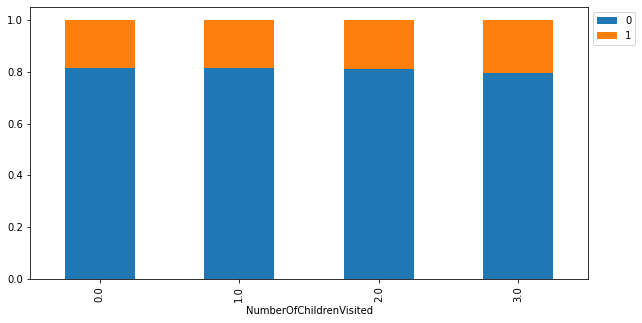

In [45]:
stacked_plot(data['NumberOfChildrenVisited'])

* The impact of this variable is not really significant

#### Impact of product pitched on purchase

ProdTaken          0    1   All
ProductPitched                 
Deluxe           322   20   342
King             210   20   230
Multi           1290  552  1842
Standard         618  124   742
Super Deluxe    1528  204  1732
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


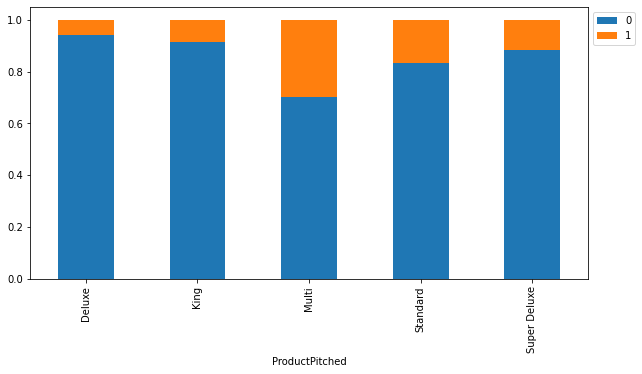

In [16]:
stacked_plot(data['ProductPitched'])

* The proportion of customers purchasing the product is greater among the multi and standard packages

#### Impact of marital status on purchase

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


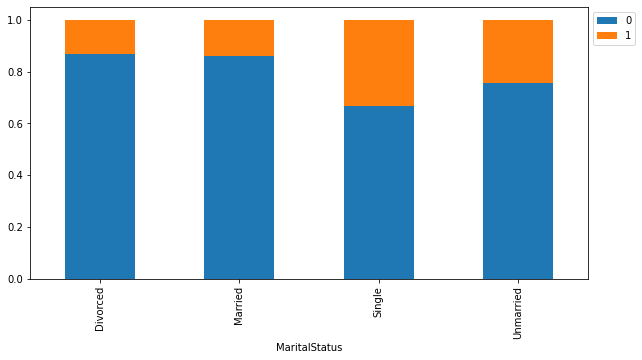

In [15]:
stacked_plot(data['MaritalStatus'])

* The proportion of customers purchasing the products is greater among single or unmarried people

#### Impact of designation on purchase

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


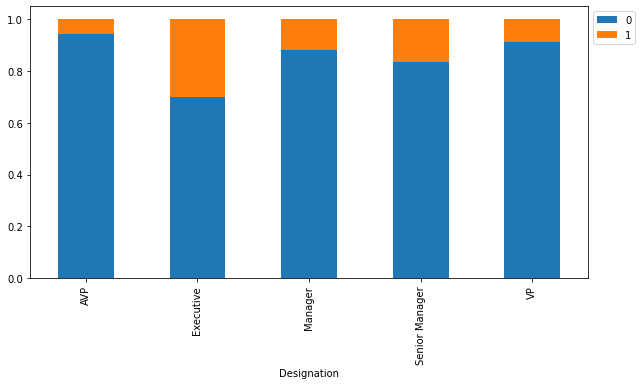

In [19]:
stacked_plot(data['Designation'])

* The proportion of customers purchasing the product is greater among executives

#### Impact of Preferred login device on purchase

ProdTaken                0    1   All
PreferredLoginDevice                 
Company Invited       1109  310  1419
Self Enquiry          2837  607  3444
All                   3946  917  4863
------------------------------------------------------------------------------------------------------------------------


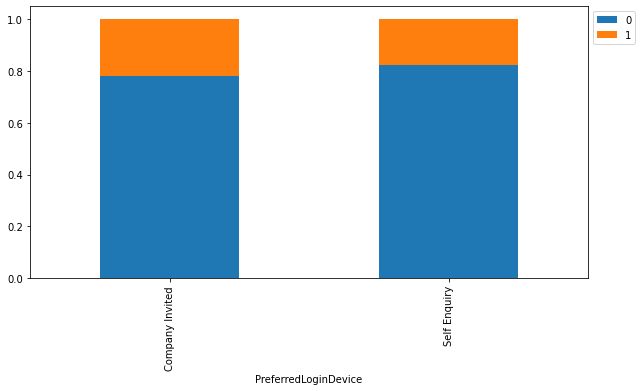

In [20]:
stacked_plot(data['PreferredLoginDevice'])

* The proportion of customers purchasing the product is greater among customers invited by a company than self enquiry.

#### Impact of occupation on purchase

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


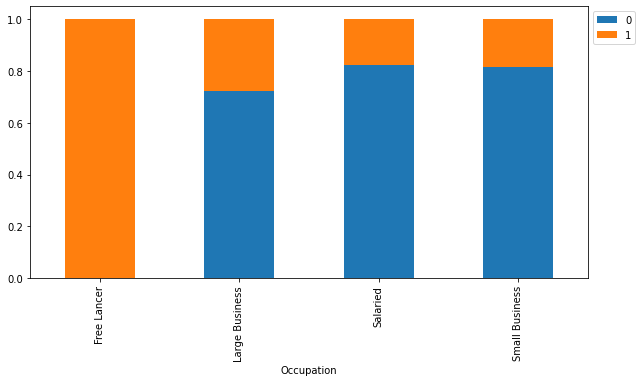

In [21]:
stacked_plot(data['Occupation'])

* The very small numbers of free lancers (only 2) is not enough to draw any firm conclusions regarding this specific category.
* However, there is greater proportion of customers purchasing the product among people managing large businesses rather than small businesses or salaried.

In [51]:
data.groupby('Designation').mean()[['MonthlyIncome']]

,MonthlyIncome
Designation,
1,20113.690011
2,26637.749326
3,22725.416859
4,35878.947826
5,32241.046784


## Data preprocessing
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

### Missing value Treatment

* Some columns have null values.

In [25]:
data.isnull().sum().sort_values(ascending=False).to_frame('Missing values')

,Missing values
DurationOfPitch,251
MonthlyIncome,233
Age,226
NumberOfTrips,140
NumberOfChildrenVisited,66
NumberOfFollowups,45
PreferredPropertyStar,26
PreferredLoginDevice,25
Designation,0
OwnCar,0


Replacing null values with mean for numerical variables and unknown for categorical variables:

In [16]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature].fillna('unknown', inplace=True)
    else:
        data[feature].fillna(int(data[feature].mean()), inplace=True)

### Converting object data types into categorical variables in order to reduce memory usage.

In [17]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = data[feature].astype("category")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   int64   
 1   Age                      4888 non-null   float64 
 2   PreferredLoginDevice     4888 non-null   category
 3   CityTier                 4888 non-null   int64   
 4   DurationOfPitch          4888 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   int64   
 8   NumberOfFollowups        4888 non-null   float64 
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4888 non-null   float64 
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4888 non-null   float64 
 13  Passport                 4888 non-null   int64   
 14  PitchSat

### Using one hot encoding of categorical variables

In [19]:
for feature in data.columns:
    if pd.api.types.is_categorical_dtype(data[feature]):
        print(data[feature].value_counts(), '\n')

Self Enquiry       3444
Company Invited    1419
unknown              25
Name: PreferredLoginDevice, dtype: int64 

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64 

Male      2916
Female    1972
Name: Gender, dtype: int64 

Multi           1842
Super Deluxe    1732
Standard         742
Deluxe           342
King             230
Name: ProductPitched, dtype: int64 

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64 

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64 



In [20]:
replaceStruct = {
                'PreferredLoginDevice': {"unknown": 1, "Self Enquiry": 2 ,"Company Invited": 3},
                'ProductPitched': {"Multi": 1, "Standard": 2 , "Super Deluxe": 3, 'King': 4, 'Deluxe': 5},
                'Designation': {'Executive': 1, 'Senior Manager': 2, 'Manager': 3, 'VP': 4, 'AVP': 5},
                'Occupation': {'Free Lancer': 1, 'Large Business': 2, 'Small Business': 3, 'Salaried': 4},
                'MaritalStatus': {'Single': 1, 'Unmarried': 2, 'Married': 3, 'Divorced': 4}
                    }

oneHotCols = ['Gender']

In [21]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols, drop_first=True)
data.head(10)

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,Gender_Male
0,1,41.0,2,3,6.0,4,3,3.0,3,3.0,1,1.0,1,2,1,0.0,3,20993.0,0
1,0,49.0,3,1,14.0,4,3,4.0,3,4.0,4,2.0,0,3,1,2.0,3,20130.0,1
2,1,37.0,2,1,8.0,1,3,4.0,1,3.0,1,7.0,1,3,0,0.0,1,17090.0,1
3,0,33.0,3,1,9.0,4,2,3.0,1,3.0,4,2.0,1,5,1,1.0,1,17909.0,0
4,0,37.0,2,1,8.0,3,2,3.0,1,4.0,4,1.0,0,5,1,0.0,1,18468.0,1
5,0,32.0,3,1,8.0,4,3,3.0,1,3.0,1,1.0,0,5,1,1.0,1,18068.0,1
6,0,59.0,2,1,9.0,3,2,2.0,1,5.0,4,5.0,1,2,1,1.0,1,17670.0,0
7,0,30.0,2,1,30.0,4,3,3.0,1,3.0,3,2.0,0,2,0,1.0,1,17693.0,1
8,0,38.0,3,1,29.0,4,2,4.0,2,3.0,2,1.0,0,3,0,0.0,2,24526.0,1
9,0,36.0,2,1,33.0,3,3,3.0,3,3.0,4,7.0,0,3,1,0.0,3,20237.0,1


### Treatment of outliers

Although we have already identified outliers in the number of trips, duration of pitch and monthly income columns, it is not necessary to treat them as the impact of outliers on decision trees type algorithms is negligible.

### Split the data into train and test sets

In [22]:
X = data.drop("ProdTaken" , axis=1)
y = data["ProdTaken"]

Because the target variables is imbalance (81.2 % customers not taking product vs 18.8 % taking product), stratification is required in the split.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=3, stratify=y)

## Model building - Bagging
Build Decision tree, bagging classifier and random forest.

### Model performance evaluation

* If the model fails to detect the customers purchasing the product (False Negative), the company will lose money.
* If the model predicts incorrectly the customers not purchasing the product (False Positive), the marketing team will have wasted its efforts in targeting the wrong customer.
* However, the greater loss for the company would be if the model fails to detect the potential customers purchasing the product. Therefore the emphasis should be put on reducing the number of False Negative, hence maximizing the recall.

Before building the model, let's create functions to calculate recall on train/test sets and plot the confusion matrix

In [24]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    score_list.extend((train_recall,test_recall))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        
    else:
        return score_list # returning the list with train and test scores

### Decision tree without tuning

In [35]:
dTree = tree.DecisionTreeClassifier(random_state=3, class_weight='balanced')
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

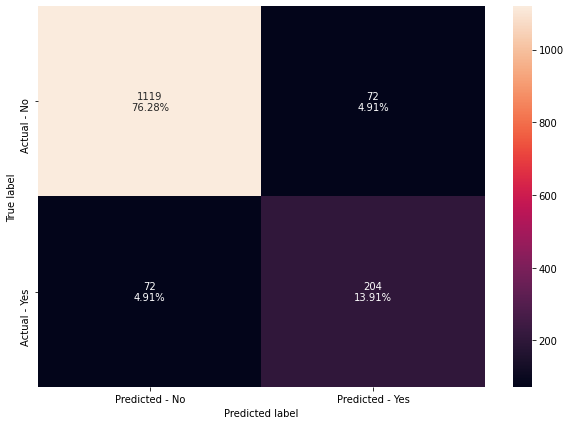

In [36]:
make_confusion_matrix(dTree, y_test)

In [37]:
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.7391304347826086


* In the absence of hyperparameter tuning or pruning, the tree got too complex and is subject to overfitting.

#### Feature importance

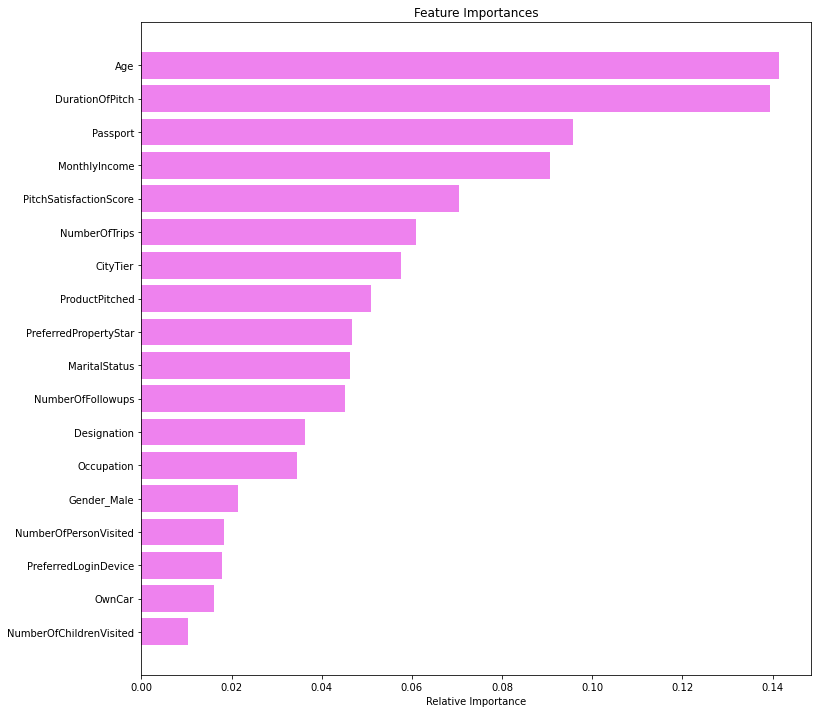

In [38]:
importances = dTree.feature_importances_
indices = np.argsort(importances)
feature_names=list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Decision tree with hyperparameter tuning

Use grid search for hyperparameter tuning

In [55]:
# Choose the type of classifier. 
dTree_tuned = tree.DecisionTreeClassifier(random_state=3, class_weight='balanced')

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [3, 5, 7, 10, 15],
              'max_leaf_nodes': [8, 32, 64, 128, 256],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=64,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

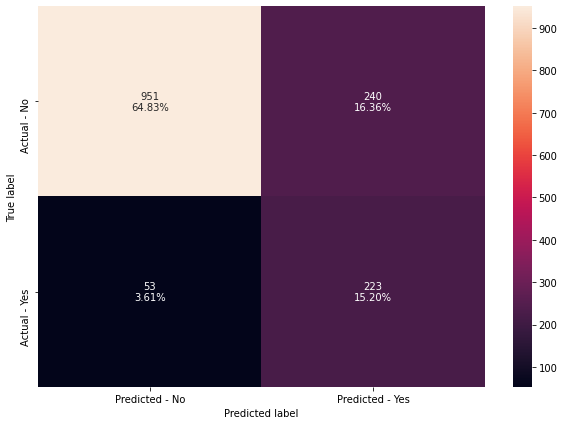

In [56]:
make_confusion_matrix(dTree_tuned, y_test)

In [57]:
# Recall on train and test
get_recall_score(dTree_tuned)

Recall on training set :  0.9145962732919255
Recall on test set :  0.8079710144927537


* Thanks to hyper parameter tuning, the recall score on the testing set has increased from 73.9% to 80.8%.
* The recall score on the training set has decreased thus showing that the decision tree is less prone to overfitting with the new constrains.

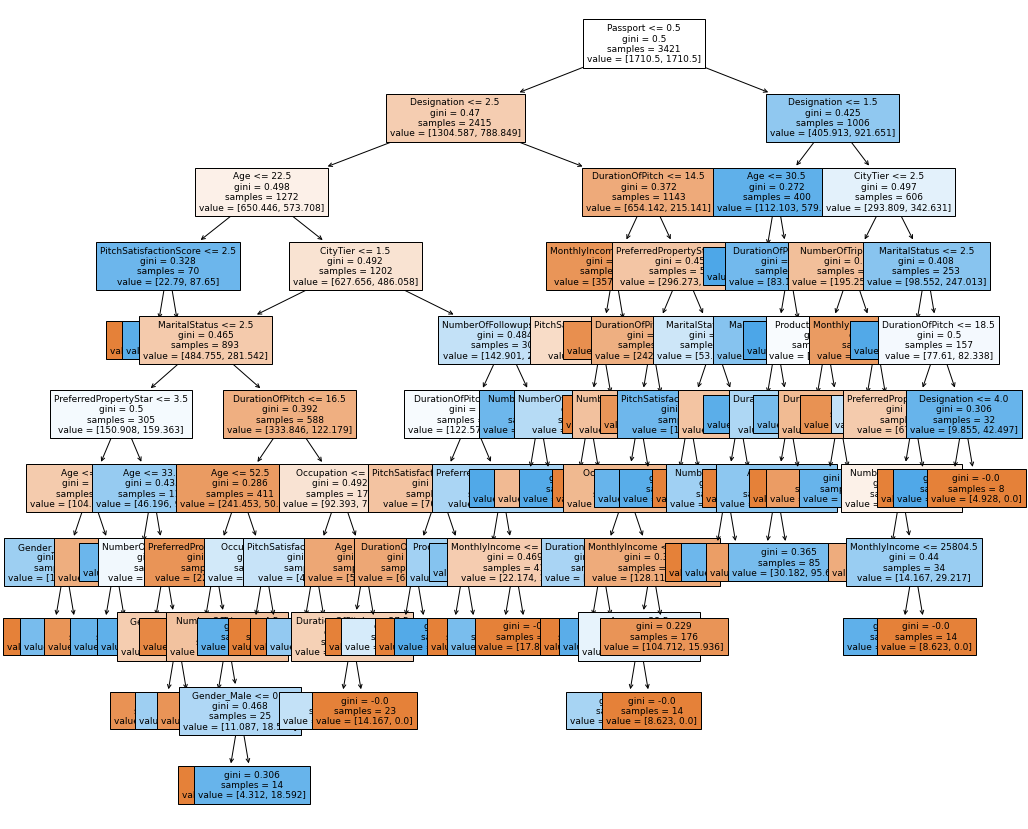

In [42]:
plt.figure(figsize=(17,15))
tree.plot_tree(dTree_tuned,feature_names=feature_names, filled=True, fontsize=9)
plt.show()

#### Feature importance

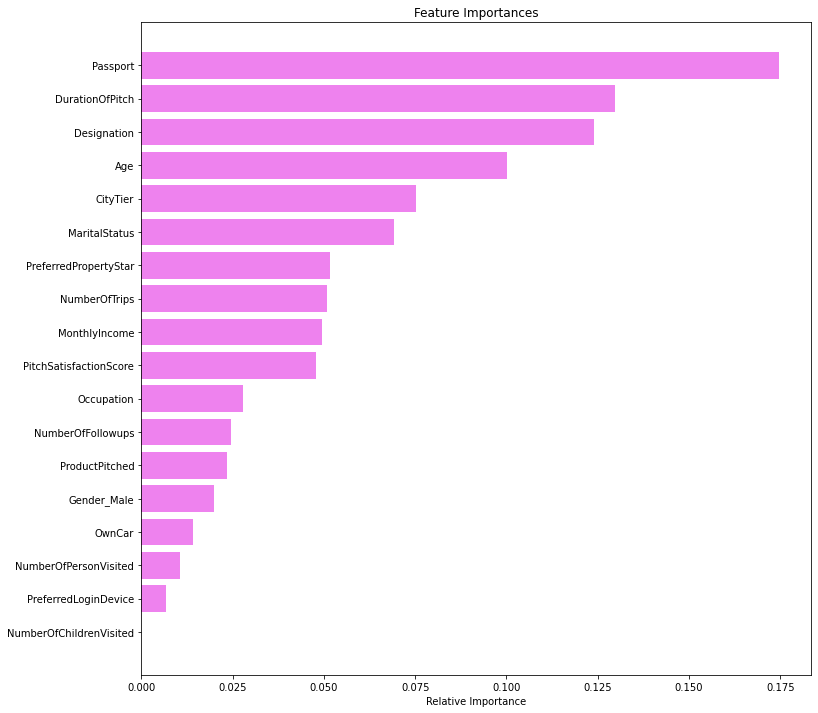

In [43]:
importances = dTree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names=list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Decision tree with Cost Complexity Pruning

In [44]:
clf = tree.DecisionTreeClassifier(random_state=3, class_weight='balanced')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [45]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,1.013477e-16
1,0.000118,3.549561e-04
2,0.000170,6.953237e-04
3,0.000170,1.035691e-03
4,0.000173,1.726755e-03
...,...,...
201,0.007495,4.064791e-01
202,0.013763,4.202422e-01
203,0.014536,4.347782e-01
204,0.017368,4.521464e-01


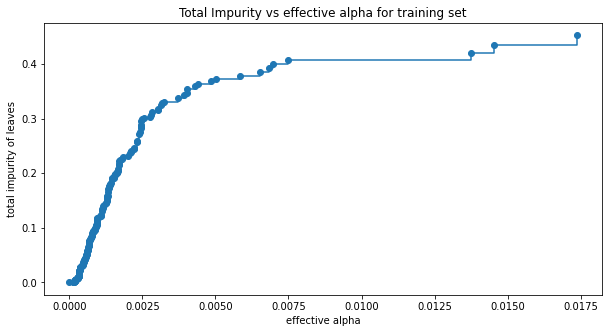

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [47]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=3, class_weight='balanced', ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

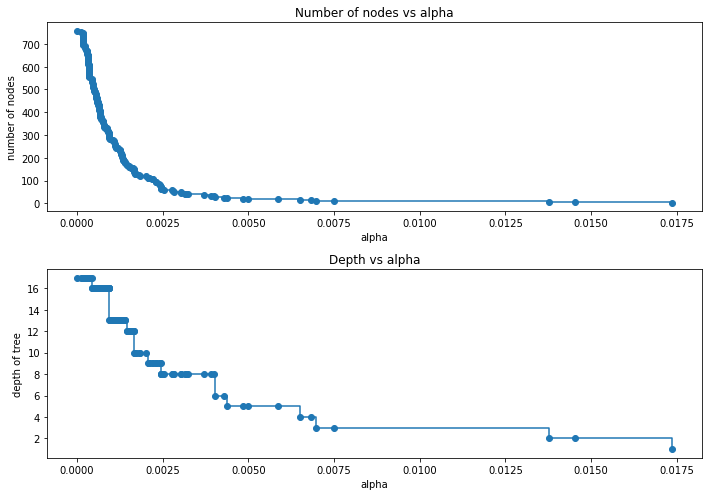

In [48]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [49]:
recall_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [50]:
recall_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

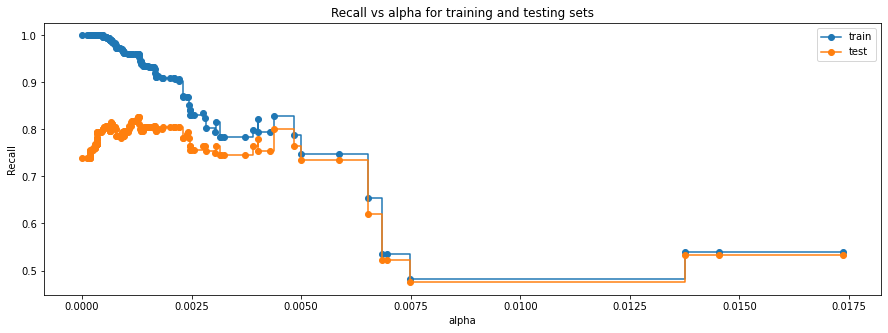

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [52]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
dTree_pruned = clfs[index_best_model]
print(dTree_pruned)

DecisionTreeClassifier(ccp_alpha=0.001272418548876897, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=3, splitter='best')


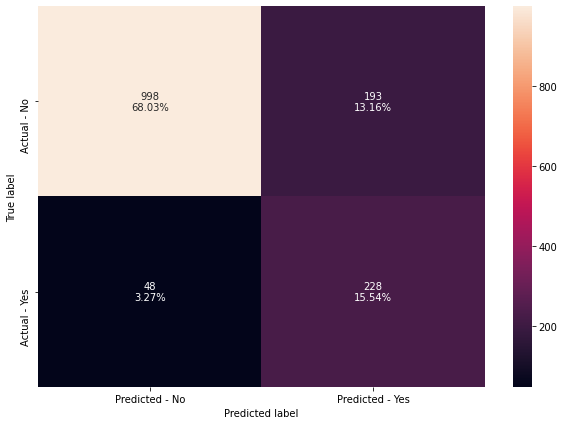

In [53]:
make_confusion_matrix(dTree_pruned, y_test)

In [54]:
# Recall on train and test
get_recall_score(dTree_pruned)

Recall on training set :  0.9596273291925466
Recall on test set :  0.8260869565217391


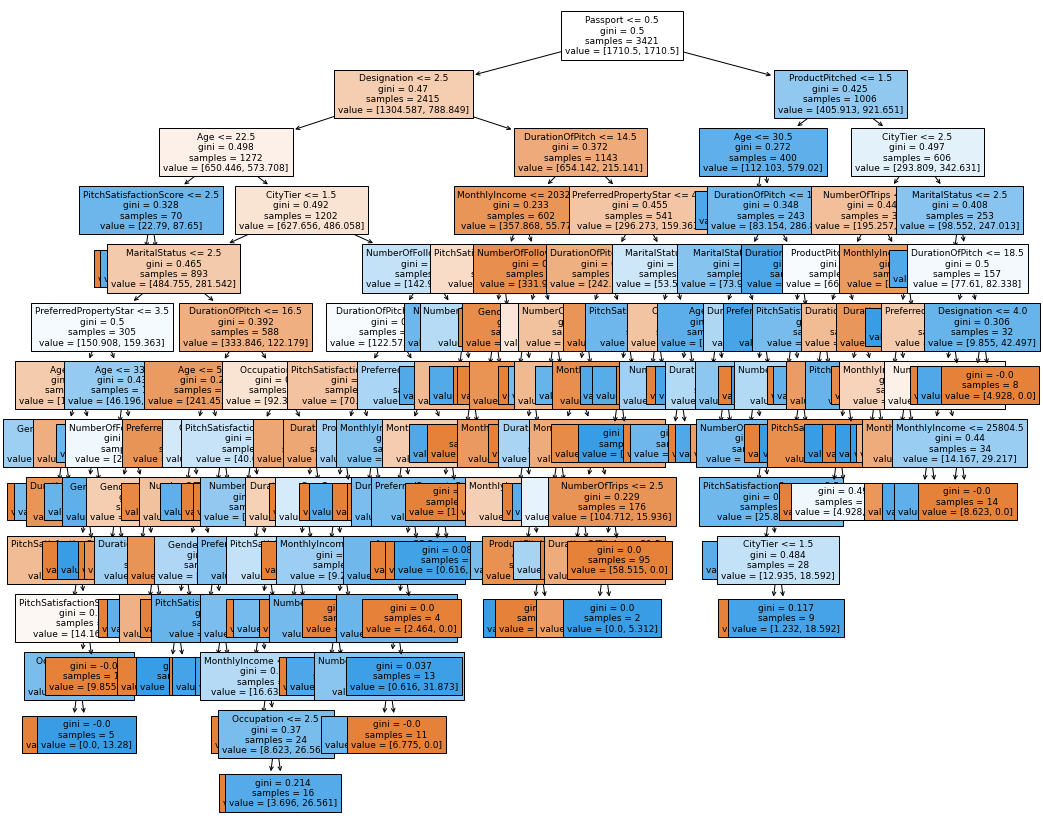

In [58]:
plt.figure(figsize=(17,15))
tree.plot_tree(dTree_pruned,feature_names=feature_names, filled=True, fontsize=9)
plt.show()

#### Feature importance

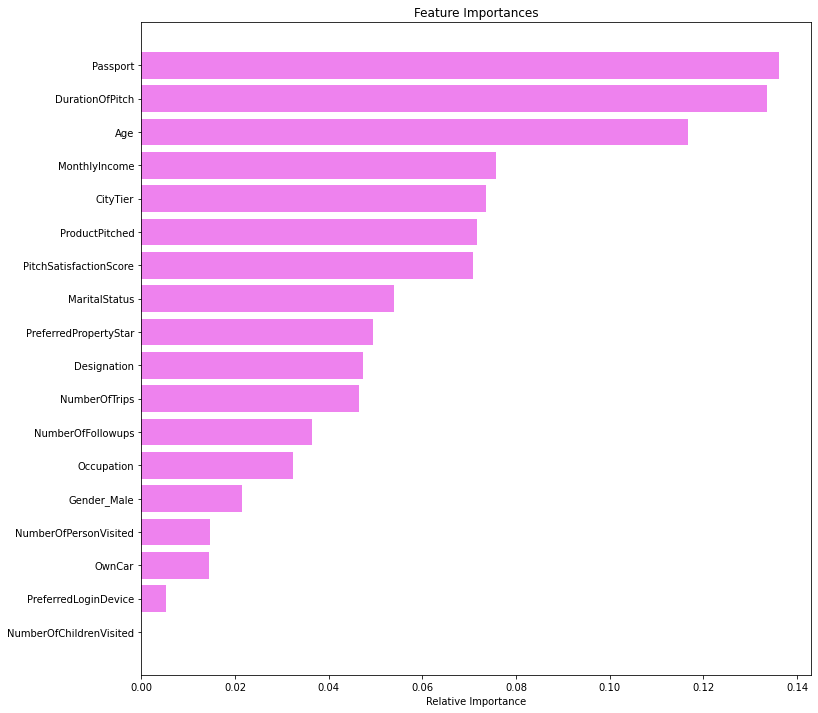

In [59]:
importances = dTree_pruned.feature_importances_
indices = np.argsort(importances)
feature_names=list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Bagging classifier

#### Bagging with decision tree estimator

In [80]:
bagging_dTree = BaggingClassifier(dTree_tuned, random_state=3) 
bagging_dTree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=64,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=8,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=3,
 

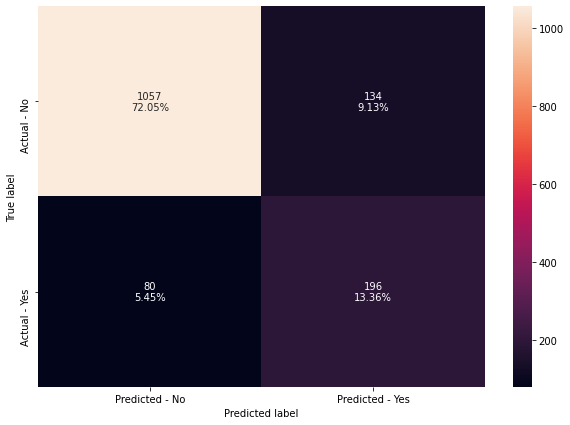

In [81]:
make_confusion_matrix(bagging_dTree, y_test)

In [82]:
# Recall on train and test
get_recall_score(bagging_dTree)

Recall on training set :  0.8586956521739131
Recall on test set :  0.7101449275362319


In [83]:
# Choose the type of classifier. 
bagging_dTree_tuned = BaggingClassifier(dTree_tuned, random_state=3)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1.0], 
              'max_features': [0.7,0.8,0.9,1.0],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_dTree_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_dTree_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=64,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=8,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=3,
 

In [84]:
# Recall on train and test
get_recall_score(bagging_dTree_tuned)

Recall on training set :  0.8633540372670807
Recall on test set :  0.7282608695652174


#### Bagging with logistic regression estimator

In [85]:
bagging_lr = BaggingClassifier(LogisticRegression(class_weight='balanced', max_iter=1000), random_state=3) 
bagging_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                    class_weight='balanced',
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
       

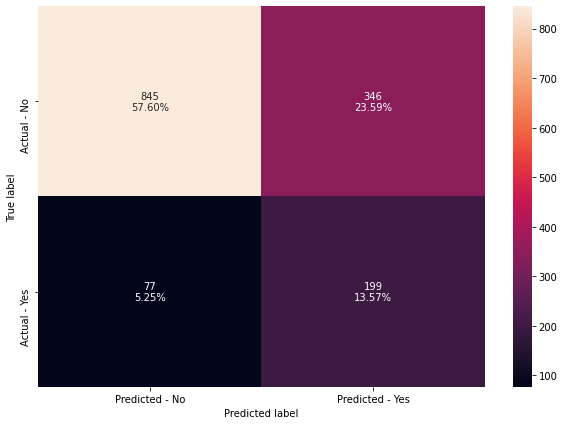

In [86]:
make_confusion_matrix(bagging_lr, y_test)

In [87]:
# Recall on train and test
get_recall_score(bagging_lr)

Recall on training set :  0.734472049689441
Recall on test set :  0.7210144927536232


### Random forest

In [203]:
# Choose the type of classifier. 
RF = RandomForestClassifier(random_state=3, max_depth=10, class_weight='balanced')

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [50,100,200],     
    "min_samples_leaf": [5,10],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_samples": [0.7, 0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(RF, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RF = grid_obj.best_estimator_

# Fit the best algorithm to the data.
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=0.9,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

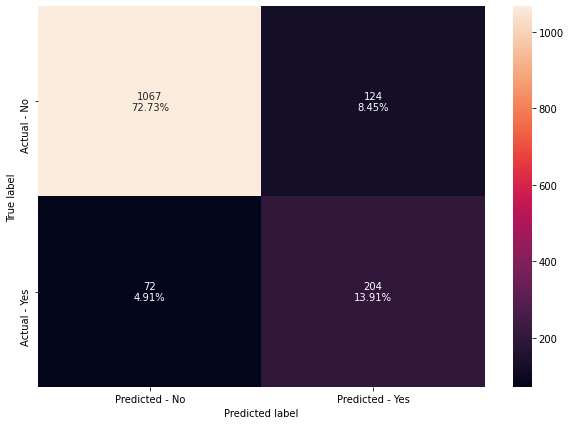

In [204]:
make_confusion_matrix(RF, y_test)

In [205]:
# Recall on train and test
get_recall_score(RF)

Recall on training set :  0.8944099378881988
Recall on test set :  0.7391304347826086


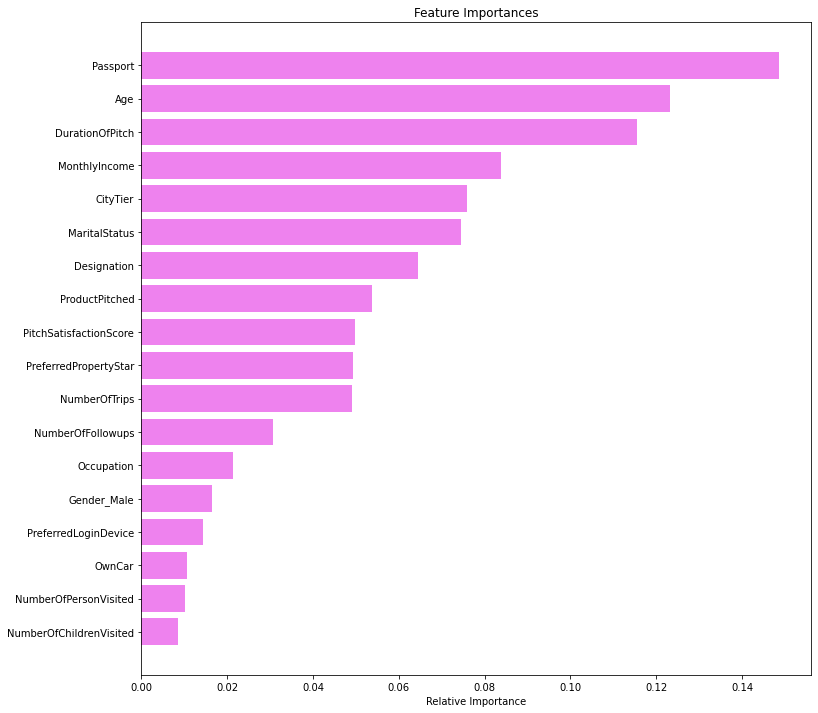

In [259]:
importances = RF.feature_importances_
indices = np.argsort(importances)
feature_names=list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model building - Boosting
Build Adaboost, gradient boost, xgboost and stacking classifier

### Adaboost classifier

In [93]:
# Choose the type of classifier. 
abc = AdaBoostClassifier(dTree_tuned, random_state=3)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [10, 20, 50, 100],
    "learning_rate": [0.1, 0.5, 1, 2]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=64,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=8,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

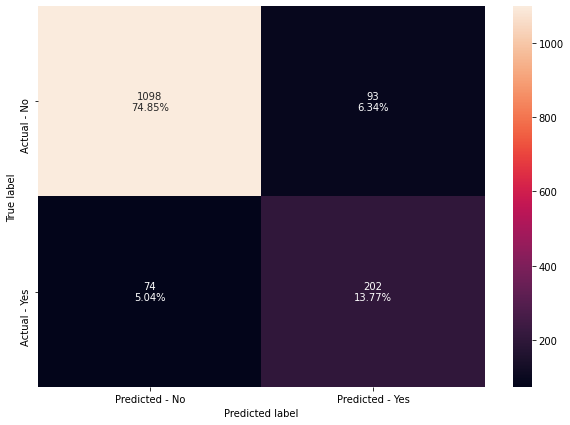

In [94]:
make_confusion_matrix(abc, y_test)

In [95]:
# Recall on train and test
get_recall_score(abc)

Recall on training set :  1.0
Recall on test set :  0.7318840579710145


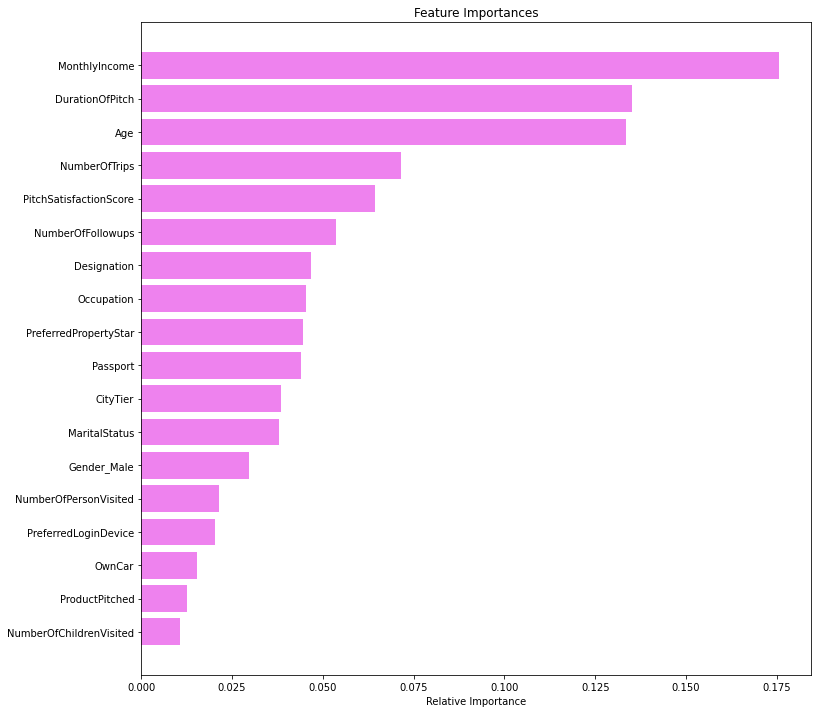

In [96]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names=list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient boosting classifier

In [123]:
# Choose the type of classifier. 
gbc = GradientBoostingClassifier(init=abc, random_state=3)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                         class_weight='balanced',
                                                                                         criterion='gini',
                                                                                         max_depth=10,
                                                                                         max_features=None,
                                                                                         max_leaf_nodes=64,
                                                                                         min_impurity_decrease=0.0,
                                                                                         min_impurit

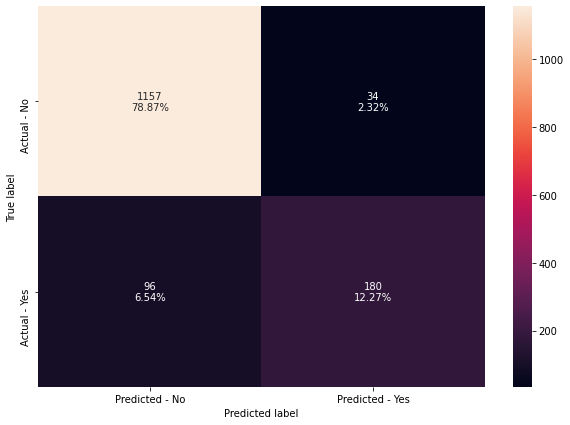

In [124]:
make_confusion_matrix(gbc, y_test)

In [125]:
# Recall on train and test
get_recall_score(gbc)

Recall on training set :  0.967391304347826
Recall on test set :  0.6521739130434783


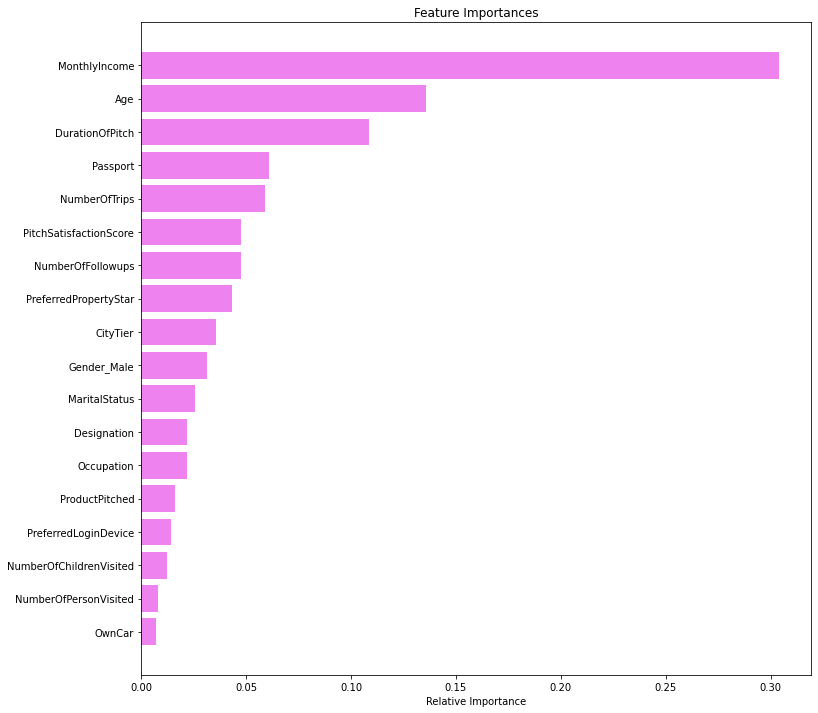

In [126]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names=list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

In [187]:
xgb = XGBClassifier(random_state=3, max_depth=20, colsample_bytree= 0.9, scale_pos_weight=100)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=3, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=100, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

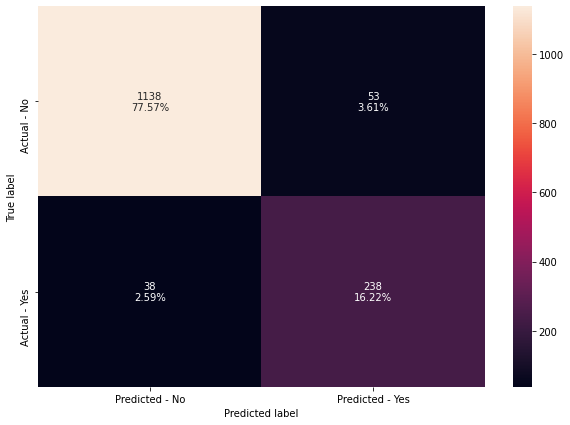

In [238]:
make_confusion_matrix(xgb, y_test)

In [188]:
# Recall on train and test
get_recall_score(xgb)

Recall on training set :  1.0
Recall on test set :  0.8623188405797102


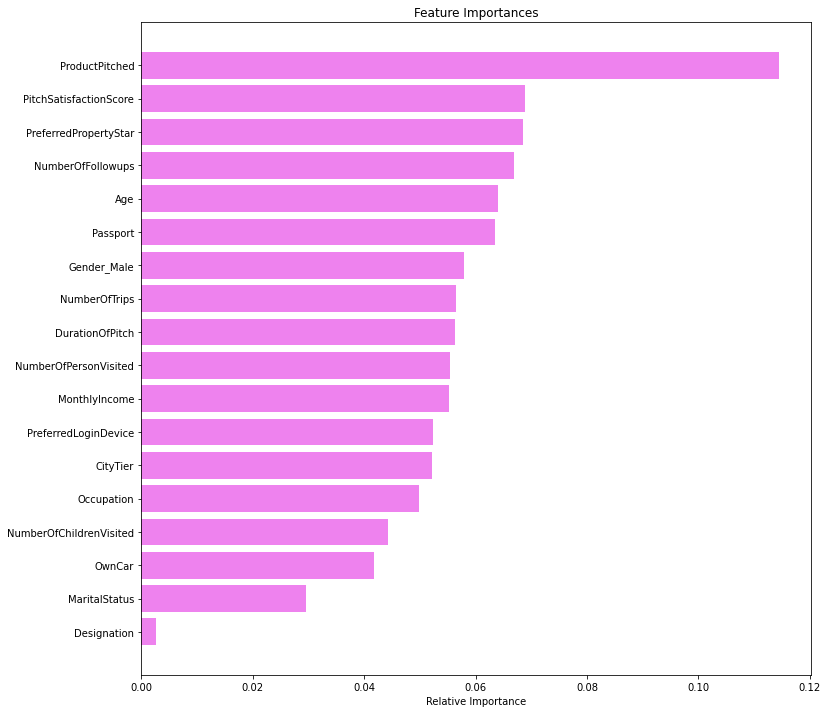

In [258]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names=list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Stacking model

In [250]:
estimators=[('Decision Tree', dTree_pruned),('Random forest', RF),('Ada boost', abc)]
final_estimator=XGBClassifier(random_state=3, max_depth=1, scale_pos_weight=5)

In [251]:
stacking=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.001272418548876897,
                                                       class_weight='balanced',
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='dep

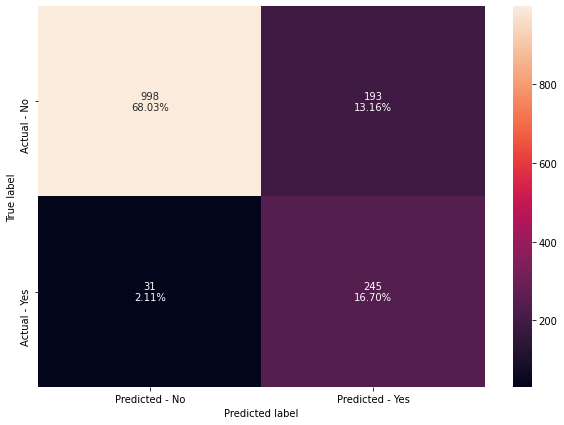

In [252]:
make_confusion_matrix(stacking, y_test)

In [253]:
# Recall on train and test
get_recall_score(stacking)

Recall on training set :  0.9984472049689441
Recall on test set :  0.8876811594202898


## Comparing models performance

In [254]:
# defining list of models
models = [dTree, dTree_tuned, dTree_pruned, bagging_dTree, bagging_dTree_tuned, bagging_lr, RF, abc, gbc, xgb, stacking]

# defining empty lists to add train and test results
recall_train = []
recall_test = []

# looping through all the models to get the recall scores
for model in models:
    j = get_recall_score(model,False)
    recall_train.append(np.round(j[0],3))
    recall_test.append(np.round(j[1],3))

In [255]:
comparison_frame = pd.DataFrame({'Model':['Decision tree without tuning','Decision tree with hyperparameter tuning',
                                        'Decision tree with pruning', 'Bagging Decision tree', 'Tuned Bagging Decision tree', 'Bagging Logistic Regression', 
                                          'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XG Boost', 'Stacking Classifier'], 
                                          'Train_Recall':recall_train,'Test_Recall':recall_test}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Decision tree without tuning,1.000,0.739
1,Decision tree with hyperparameter tuning,0.915,0.808
2,Decision tree with pruning,0.960,0.826
3,Bagging Decision tree,0.859,0.710
4,Tuned Bagging Decision tree,0.863,0.728
5,Bagging Logistic Regression,0.734,0.721
6,Random Forest,0.894,0.739
7,Ada Boost,1.000,0.732
8,Gradient Boosting,0.967,0.652
9,XG Boost,1.000,0.862
